In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = pd.read_csv("./train.csv")

In [ ]:
train_df.head(10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [ ]:
converted_features = ["gender","NationalITy","PlaceofBirth","StageID","GradeID","SectionID","Topic","Semester","StudentAbsenceDays","Class"]
def conver_cat(df,converted_features):
    for converted_features in converted_features:
        df[converted_features] = df[converted_features].astype("category")

conver_cat(train_df,converted_features)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   gender                    480 non-null    category
 1   NationalITy               480 non-null    category
 2   PlaceofBirth              480 non-null    category
 3   StageID                   480 non-null    category
 4   GradeID                   480 non-null    category
 5   SectionID                 480 non-null    category
 6   Topic                     480 non-null    category
 7   Semester                  480 non-null    category
 8   Relation                  480 non-null    object  
 9   raisedhands               480 non-null    int64   
 10  VisITedResources          480 non-null    int64   
 11  AnnouncementsView         480 non-null    int64   
 12  Discussion                480 non-null    int64   
 13  ParentAnsweringSurvey     480 non-null    object  

In [ ]:
train_df.describe(include=["category"])

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Under-7,M
freq,305,179,180,248,147,283,95,245,289,211


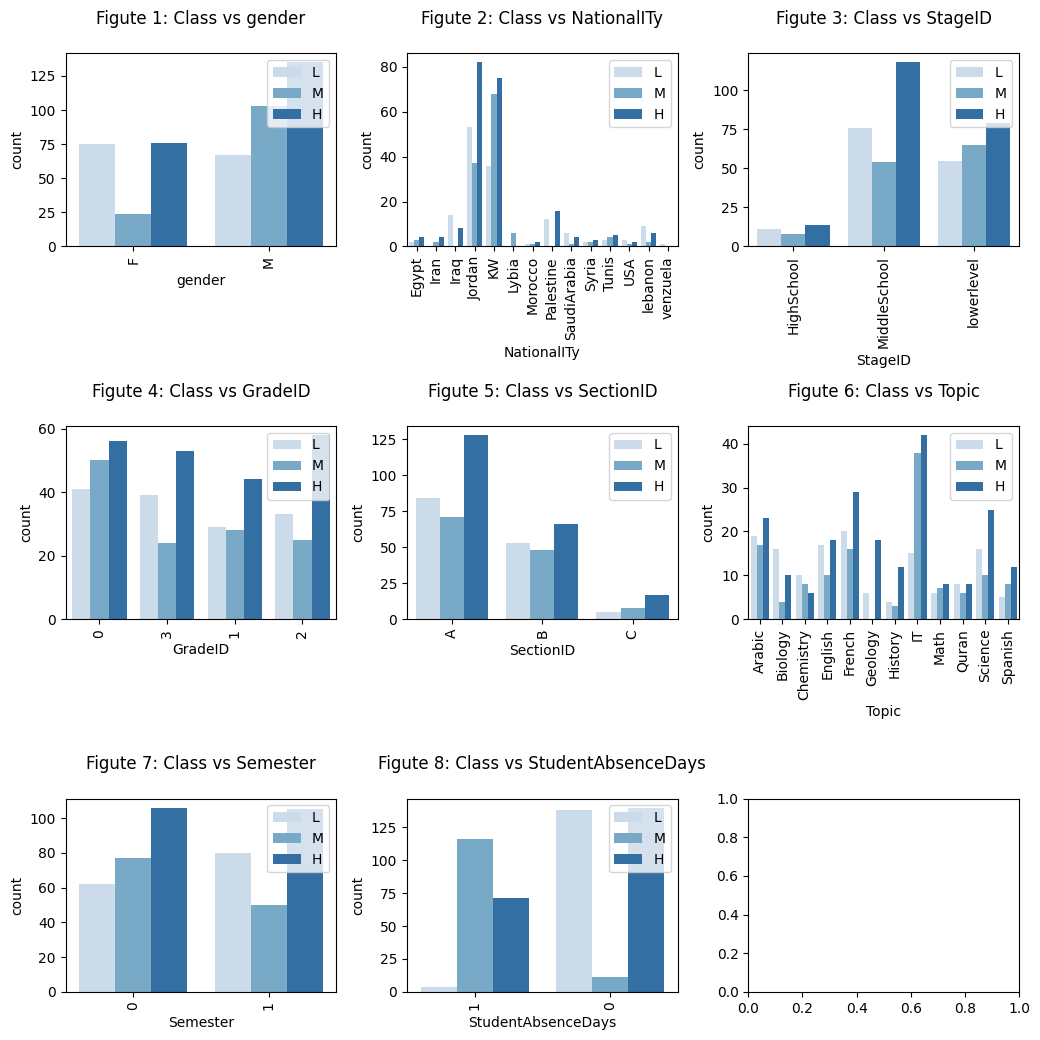

In [ ]:
cols = ["gender","NationalITy","StageID","GradeID","SectionID","Topic","Semester","StudentAbsenceDays"]

n_rows = 3
n_cols = 3

fig, ax = plt.subplots(n_rows,n_cols,figsize =(n_cols*3.5,n_rows*3.5))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r * n_cols + c # index to loop through list "cols"
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data=train_df,x= cols[i],hue= "Class",palette= "cividis", ax=ax_i)
            ticks = ax_i.get_xticks()
            ax_i.set_xticks(ticks)
            ax_i.set_xticklabels(ax_i.get_xticklabels(), rotation=90)
            ax_i.set_title(f"Class vs {cols[i]}\n")
            ax_i.legend(title="",loc= "upper right" ,labels = ["L","M","H"])

# ax.flat[-1].set_visible(False) #Remote the last subplot
plt.tight_layout()
plt.show()

In [ ]:
train_df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [ ]:
def semester(sem):
    if sem in ["F"]:
        return 0
    else:
        return 1

train_df["Semester"] = train_df["Semester"].apply(lambda sem: semester(sem))

In [ ]:
train_df["Semester"].value_counts()

0    245
1    235
Name: Semester, dtype: int64

In [ ]:
gradeID_dict = {
                "G-02" : 0,
                "G-07" : 1,
                "G-08" : 2,
                ("G-06","G-11","G-12","G-09","G-10","G-05","G-04") : 3
              }

train_df = train_df.replace({"GradeID" : gradeID_dict})

In [ ]:
train_df["GradeID"].value_counts()

0    147
3    116
2    116
1    101
Name: GradeID, dtype: int64

In [ ]:
StudentDay = {
            "Under-7" : 0,
            "Above-7" : 1
}

train_df = train_df.replace({"StudentAbsenceDays" : StudentDay})

In [ ]:
train_df["StudentAbsenceDays"].value_counts()

0    289
1    191
Name: StudentAbsenceDays, dtype: int64

In [ ]:
train_df["Topic"].value_counts()

IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64

In [ ]:
train_df["Relation"].drop

<bound method Series.drop of 0      Father
1      Father
2      Father
3      Father
4      Father
        ...  
475    Father
476    Father
477    Father
478    Father
479    Father
Name: Relation, Length: 480, dtype: object>

In [ ]:
train_df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,3,A,IT,0,Father,15,16,2,20,Yes,Good,0,M
1,M,KW,KuwaIT,lowerlevel,3,A,IT,0,Father,20,20,3,25,Yes,Good,0,M
2,M,KW,KuwaIT,lowerlevel,3,A,IT,0,Father,10,7,0,30,No,Bad,1,L
3,M,KW,KuwaIT,lowerlevel,3,A,IT,0,Father,30,25,5,35,No,Bad,1,L
4,M,KW,KuwaIT,lowerlevel,3,A,IT,0,Father,40,50,12,50,No,Bad,1,M


In [ ]:
cos = ["Relation","AnnouncementsView","ParentAnsweringSurvey","PlaceofBirth"]
train_df = train_df.drop(columns=cos)

In [ ]:
train_df.head()

,gender,NationalITy,StageID,GradeID,SectionID,Topic,Semester,raisedhands,VisITedResources,Discussion,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,lowerlevel,3,A,IT,0,15,16,20,Good,0,M
1,M,KW,lowerlevel,3,A,IT,0,20,20,25,Good,0,M
2,M,KW,lowerlevel,3,A,IT,0,10,7,30,Bad,1,L
3,M,KW,lowerlevel,3,A,IT,0,30,25,35,Bad,1,L
4,M,KW,lowerlevel,3,A,IT,0,40,50,50,Bad,1,M


In [ ]:
train_df.head(10)

,gender,NationalITy,StageID,GradeID,SectionID,Topic,Semester,raisedhands,VisITedResources,Discussion,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,lowerlevel,3,A,IT,0,15,16,20,Good,0,M
1,M,KW,lowerlevel,3,A,IT,0,20,20,25,Good,0,M
2,M,KW,lowerlevel,3,A,IT,0,10,7,30,Bad,1,L
3,M,KW,lowerlevel,3,A,IT,0,30,25,35,Bad,1,L
4,M,KW,lowerlevel,3,A,IT,0,40,50,50,Bad,1,M
5,F,KW,lowerlevel,3,A,IT,0,42,30,70,Bad,1,M
6,M,KW,MiddleSchool,1,A,Math,0,35,12,17,Bad,1,L
7,M,KW,MiddleSchool,1,A,Math,0,50,10,22,Good,0,M
8,F,KW,MiddleSchool,1,A,Math,0,12,21,50,Good,0,M
9,F,KW,MiddleSchool,1,B,IT,0,70,80,70,Good,0,M


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   gender                    480 non-null    category
 1   NationalITy               480 non-null    category
 2   StageID                   480 non-null    category
 3   GradeID                   480 non-null    category
 4   SectionID                 480 non-null    category
 5   Topic                     480 non-null    category
 6   Semester                  480 non-null    category
 7   raisedhands               480 non-null    int64   
 8   VisITedResources          480 non-null    int64   
 9   Discussion                480 non-null    int64   
 10  ParentschoolSatisfaction  480 non-null    object  
 11  StudentAbsenceDays        480 non-null    category
 12  Class                     480 non-null    category
dtypes: category(9), int64(3), object(1)
memory usage: 

In [ ]:
train_df["ParentschoolSatisfaction"] = train_df['ParentschoolSatisfaction'].astype("category")

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   gender                    480 non-null    category
 1   NationalITy               480 non-null    category
 2   StageID                   480 non-null    category
 3   GradeID                   480 non-null    category
 4   SectionID                 480 non-null    category
 5   Topic                     480 non-null    category
 6   Semester                  480 non-null    category
 7   raisedhands               480 non-null    int64   
 8   VisITedResources          480 non-null    int64   
 9   Discussion                480 non-null    int64   
 10  ParentschoolSatisfaction  480 non-null    category
 11  StudentAbsenceDays        480 non-null    category
 12  Class                     480 non-null    category
dtypes: category(10), int64(3)
memory usage: 18.2 KB


In [ ]:
class_dict = {
                "L" : 0,
                "M" : 1,
                "H" : 2
              }

train_df = train_df.replace({"Class" : class_dict})

In [ ]:
train_df["Class"].value_counts()

1    211
2    142
0    127
Name: Class, dtype: int64

In [ ]:
train_df["Class"] = train_df['Class'].astype("category")

In [ ]:
cat_feature = ["gender","NationalITy","StageID","GradeID","SectionID","Topic","StudentAbsenceDays"]
num_feature = ["raisedhands","VisITedResources","Discussion"]
feature_cols = cat_feature + num_feature
print(feature_cols)

['gender', 'NationalITy', 'StageID', 'GradeID', 'SectionID', 'Topic', 'StudentAbsenceDays', 'raisedhands', 'VisITedResources', 'Discussion']


In [ ]:
X = train_df[feature_cols]
y = train_df["Class"]

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])


In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformer,num_feature),
    ("cat",cat_transformer,cat_feature)
])

In [ ]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['raisedhands', 'VisITedResources',
                                  'Discussion']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'NationalITy', 'StageID', 'GradeID',
                                  'SectionID', 'Topic',
                                  'StudentAbsenceDays'])])

In [ ]:
X = preprocessor.transform(X) # X-> X_train, X_val

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape,X_val.shape

((384, 43), (96, 43))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,classification_report,confusion_matrix,recall_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier ,ExtraTreesClassifier,AdaBoostClassifier
from xgboost import XGBRFClassifier

In [ ]:
log_reg = LogisticRegression(solver="liblinear", max_iter=1000)
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
log_reg.score(X_val,y_val)

0.6979166666666666

In [ ]:
y_pred = log_reg.predict(X_val)

In [ ]:
precision_score(y_val, y_pred, average='micro'), recall_score(y_val,y_pred,average="micro")

(0.6979166666666666, 0.6979166666666666)

In [ ]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85        23
           1       0.67      0.73      0.70        45
           2       0.67      0.43      0.52        28

    accuracy                           0.70        96
   macro avg       0.70      0.71      0.69        96
weighted avg       0.69      0.70      0.68        96



In [ ]:
poly = PolynomialFeatures(degree=2)
poly_features_X_train = poly.fit_transform(X_train)
poly_features_X_val = poly.fit_transform(X_val)

In [ ]:
poly_log_reg = LogisticRegression(solver="liblinear", max_iter=1000)
poly_log_reg.fit(poly_features_X_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
poly_log_reg.score(poly_features_X_val,y_val)

0.75

In [ ]:
# Decision Tree
decision_tree = DecisionTreeClassifier(criterion="entropy",max_depth=5,random_state=2022)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2022)

In [ ]:
decision_tree.score(X_val,y_val)

0.6979166666666666

In [ ]:
log_reg_cv = LogisticRegression(solver="liblinear", max_iter=1000)
dt_vc = DecisionTreeClassifier(criterion="entropy",max_depth=5,random_state=2022)

lr_scores = cross_val_score(log_reg_cv,X,y,scoring="accuracy",cv = 5)

In [ ]:
lr_scores.mean(),lr_scores.std()

(0.55625, 0.05043216015379253)

In [ ]:
dt_scores = cross_val_score(dt_vc,X,y,scoring="accuracy",cv = 5)

In [ ]:
dt_scores.mean(),dt_scores.std()

(0.6395833333333334, 0.06373774391990981)

In [ ]:
seed = 0
models = [
    LinearSVC(max_iter=12000,random_state=seed,dual=False),
    SVC(random_state=seed),
    KNeighborsClassifier(metric="minkowski", p=2),
    LogisticRegression(solver="liblinear",max_iter=1000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBRFClassifier(use_label_encoder = False, eval_metric = "logloss",random_state=seed)
]

In [ ]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline(models , X , y, metrics,cv=5, plot_results = False):
    kfold = StratifiedKFold(cv,shuffle=True,random_state=seed)
    entries=[]
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model,X,y,scoring=metrics,cv=kfold)
        for fold_idx , score in enumerate(scores):
            entries.append((model_name,fold_idx,score))

    cv_df = pd.DataFrame(entries,columns=["model","fold_id","accuracy_score"])

    # Summary Result
    mean = cv_df.groupby("model")["accuracy_score"].mean()
    std = cv_df.groupby("model")["accuracy_score"].std()

    baseline_results = pd.concat([mean,std],axis=1,ignore_index=True)
    baseline_results.columns = ["Mean","Std"]

    # Sort by accuracy
    baseline_results.sort_values(by = ["Mean"], ascending= False, inplace=True)

    return baseline_results

generate_baseline(models,X,y,metrics="accuracy",cv=5,plot_results=False)

,Mean,Standard Deviation
model_name,,
RandomForestClassifier,0.772917,0.015450
ExtraTreesClassifier,0.750000,0.014731
XGBRFClassifier,0.741667,0.045644
SVC,0.725000,0.037989
DecisionTreeClassifier,0.708333,0.032940
AdaBoostClassifier,0.664583,0.046234
KNeighborsClassifier,0.664583,0.023754
LogisticRegression,0.662500,0.045166
LinearSVC,0.647917,0.050173


In [ ]:
train_df.head()

,gender,NationalITy,StageID,GradeID,SectionID,Topic,Semester,raisedhands,VisITedResources,Discussion,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,lowerlevel,3,A,IT,0,15,16,20,Good,0,1
1,M,KW,lowerlevel,3,A,IT,0,20,20,25,Good,0,1
2,M,KW,lowerlevel,3,A,IT,0,10,7,30,Bad,1,0
3,M,KW,lowerlevel,3,A,IT,0,30,25,35,Bad,1,0
4,M,KW,lowerlevel,3,A,IT,0,40,50,50,Bad,1,1


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
x = "raisedhands"
y = "Discussion"
X1 = train_df[[x, y]].values

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
clusters = kmeans.labels_

In [ ]:
cluster_df = pd.DataFrame(np.hstack((X1, clusters.reshape(-1, 1))), columns=[x, y, "Class"])

[]

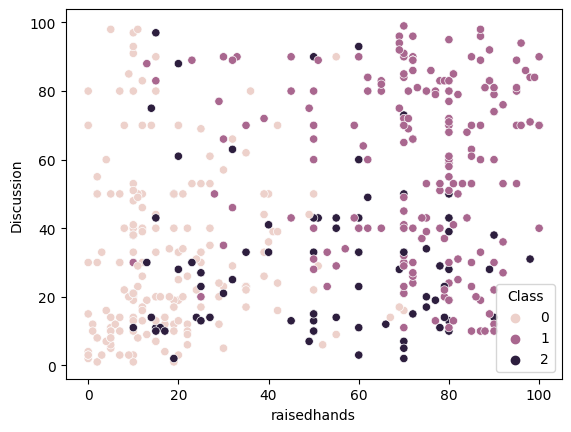

In [ ]:
sns.scatterplot(x=x, y=y, hue='Class', data=cluster_df)
plt.plot()

[]

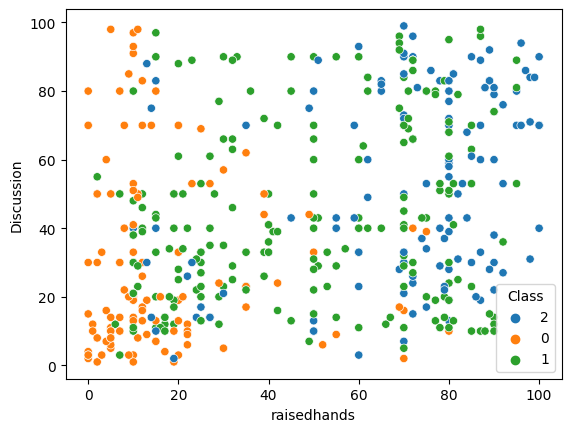

In [ ]:
sns.scatterplot(x=x, y=y, hue='Class', data=train_df)
plt.plot()